<a href="https://colab.research.google.com/github/jieunlim/TensorflowTest2022/blob/main/K_Means_in_TF_1_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf

In [55]:
tf.disable_v2_behavior()

In [56]:
# Create aliases:
tf.sub = tf.subtract

In [57]:
points_n = 200
clusters_n = 6
iteration_n = 10

In [58]:
# 1. Let’s generate random data points with a uniform distribution and assign them 
#    to a 2D tensor constant. Then, randomly choose initial centroids from the set 
#    of data points:
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

In [59]:
# 2. Next we want to be able to do element-wise subtraction of points and centroids
#    that are 2D tensors. Because the tensors have different shape, let’s expend points 
#    and centroids into 3 dimensions, which allows us to use the broadcasting feature of 
#    subtraction operation:
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [60]:
# 3. Then, calculate the distances between points and centroids and determine the 
#    cluster assignments:
distances = tf.reduce_sum(tf.square(tf.sub(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

In [61]:
# 4. Next, we can compare each cluster with a cluster assignments vector, get points 
#    assigned to each cluster, and calculate mean values. These mean values are refined 
#    centroids, so let’s update the centroids variable with the new values:
means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean( tf.gather(points, tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])),reduction_indices=[1]))

In [62]:
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)

In [63]:
init = tf.global_variables_initializer()

In [64]:
# 5. Next we run the graph. For each iteration, we update the centroids and return 
#    their values along with the cluster assignments values:
with tf.Session() as sess:
  sess.run(init)
  for step in range(iteration_n):
    [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])

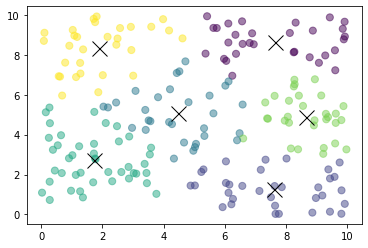

<Figure size 432x288 with 0 Axes>

In [65]:
    # Plot the progress of centrod recalculation in each iteration:
    plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, 
s=50, alpha=0.5)
    plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
    plt.pause(1)
    plt.clf()

In [66]:
# 6. We display the coordinates of the final centroids and a multi-colored 
#    scatter plot showing how the data points have been clustered: 
print("centroids" + "\n", centroid_values)

centroids
 [[7.62241088 8.6654056 ]
 [7.60695312 1.29108314]
 [4.48189007 5.06111461]
 [1.71827877 2.72093853]
 [8.63665568 4.90883619]
 [1.87167756 8.35446433]]


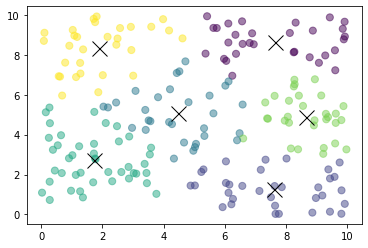

In [67]:
# 7. Finally, plot the final state of the system before exitting:
plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, 
alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.pause(1)

In [46]:
# The data in a training set is grouped into clusters as the result of implementing
# the k-means algorithm in TensorFlow.